##### 16 Feb 2021

## Cab Rides EDA

In this exercise we will perform Exploratory Data Analysis on the Cab Rides data to better understand its nuances.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time, datetime
%matplotlib inline

In [2]:
df = pd.read_csv('Cab_Rides.csv')
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


We clearly see two columns that should be datetime category.  
We need to convert them into such.

When making changes to columns using column names, we must remove special characters like '*'.  
We do that using the below function.

In [3]:
df.columns=df.columns.str.replace('*','')
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


Now we convert both the columns to datetime using the below function.

In [4]:
df.START_DATE = pd.to_datetime(df.START_DATE)
df.END_DATE = pd.to_datetime(df.END_DATE)
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


Next, we immediately notice there are some missing values in PURPOSE column.  
Let's look into it further.

In [5]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

There are 502 missing values. This is almost 45% of the total observation.  
Hence, this cannot be imputed using regular means such as average, median or mode.  

Our current order of priority is to predict the missing values.  
The next few steps comprise the trial and error method of figuring out the best alternative to do so.

In [6]:
df.nunique()

START_DATE    1154
END_DATE      1154
CATEGORY         2
START          177
STOP           188
MILES          256
PURPOSE         10
dtype: int64

In [7]:
df.PURPOSE.value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

In [8]:
# Lets calculate the duration, as there might be some relation of it to PURPOSE of Cab ride.
df['DURATION'] = df.END_DATE - df.START_DATE
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00


In [9]:
# As Duration is in datetime format, we need to convert it to float type in order to use it for analysis.
df['MINUTES'] = df['DURATION'].dt.total_seconds() /60
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,0 days 00:12:00,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00,67.0


Grouping Purpose by Miles to see if we can get any pattern.

In [10]:
df.groupby(['PURPOSE'])['MILES'].mean().round(3)

PURPOSE
Airport/Travel       5.500
Between Offices     10.944
Charity ($)         15.100
Commute            180.200
Customer Visit      20.688
Errand/Supplies      3.969
Meal/Entertain       5.698
Meeting             15.248
Moving               4.550
Temporary Site      10.474
Name: MILES, dtype: float64

In [11]:
df.groupby(['PURPOSE'])['MILES'].min().round(3)

PURPOSE
Airport/Travel       4.1
Between Offices      1.9
Charity ($)         15.1
Commute            180.2
Customer Visit       0.8
Errand/Supplies      0.5
Meal/Entertain       0.6
Meeting              0.7
Moving               3.3
Temporary Site       1.8
Name: MILES, dtype: float64

In [12]:
df.groupby(["PURPOSE"])['MILES'].max().round(3)

PURPOSE
Airport/Travel       7.6
Between Offices     39.2
Charity ($)         15.1
Commute            180.2
Customer Visit     310.3
Errand/Supplies     22.3
Meal/Entertain      36.5
Meeting            201.0
Moving               6.1
Temporary Site      48.2
Name: MILES, dtype: float64

Lets use boxplot to better visualize the spread.

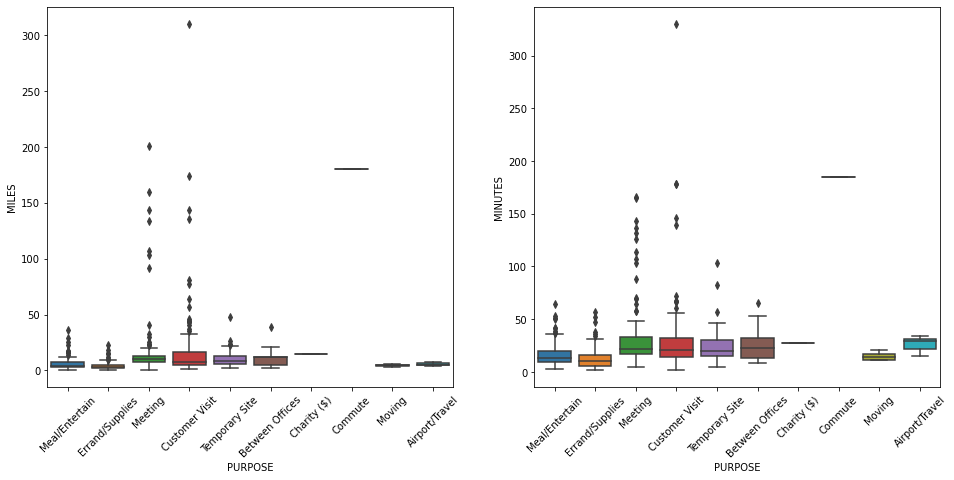

In [13]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MINUTES)
plt.xticks(rotation=45);

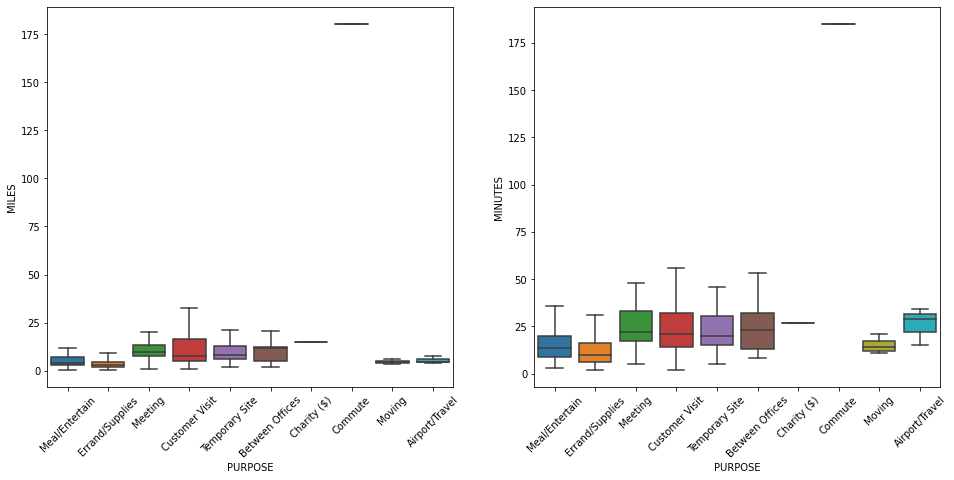

In [14]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES,showfliers=False)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MINUTES,showfliers=False)
plt.xticks(rotation=45);

In [15]:
df_new = df[df['PURPOSE'].isin(['Commute','Charity ($)','Moving','Airport/Travel']) == False]

In [16]:
df_new.shape

(1146, 9)

In [17]:
df_new.PURPOSE.value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Name: PURPOSE, dtype: int64

In [18]:
df_new.groupby(df_new.PURPOSE)['MILES'].mean().round(3)

PURPOSE
Between Offices    10.944
Customer Visit     20.688
Errand/Supplies     3.969
Meal/Entertain      5.698
Meeting            15.248
Temporary Site     10.474
Name: MILES, dtype: float64

After trying multiple approaches, I've decided to predict the missing values using Decision Tree algorithm.

In [19]:
df_na = df[df.PURPOSE.isna()]
df_na.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION,MINUTES
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,0 days 00:12:00,12.0
32,2016-01-19 09:09:00,2016-01-19 09:23:00,Business,Whitebridge,Lake Wellingborough,7.2,NaN,0 days 00:14:00,14.0
85,2016-02-09 10:54:00,2016-02-09 11:07:00,Personal,Whitebridge,Northwoods,5.3,NaN,0 days 00:13:00,13.0
86,2016-02-09 11:43:00,2016-02-09 11:50:00,Personal,Northwoods,Tanglewood,3.0,NaN,0 days 00:07:00,7.0
87,2016-02-09 13:36:00,2016-02-09 13:52:00,Personal,Tanglewood,Preston,5.1,NaN,0 days 00:16:00,16.0


In [20]:
# Initiating Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')

In [21]:
# Dropping NA values for train dataset
df_a = df.dropna()

# Splitting dataset into independent and dependent variables
X = df_a[['CATEGORY','MILES','MINUTES']]
y = df_a.PURPOSE

# As X has categorical variables, converting all to numeric type using one hot encoding
X = pd.get_dummies(X, drop_first = True)

# Training dtree model 
dtree.fit(X,y)


DecisionTreeClassifier(criterion='entropy')

In [22]:
# Storing rows with null values in X_na
X_na = df_na[['CATEGORY','MILES','MINUTES']]

# Performing one-hot encoding
X_na = pd.get_dummies(X_na, drop_first = True)

# Making the predictions using dtree model
preds = dtree.predict(X_na)
preds.shape

(502,)

In [23]:
X_na['PURPOSE'] = preds
df['PURPOSE'].fillna(X_na['PURPOSE'], inplace = True)

In [24]:
# Lets check if all missing values have been filled
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
DURATION      0
MINUTES       0
dtype: int64

In [25]:
# Lets check the difference in the PURPOSE variable
df.PURPOSE.value_counts()

Meeting            299
Errand/Supplies    254
Meal/Entertain     252
Customer Visit     172
Temporary Site      76
Moving              59
Between Offices     28
Charity ($)         10
Airport/Travel       4
Commute              1
Name: PURPOSE, dtype: int64

In [26]:
X_na.PURPOSE.value_counts()

Errand/Supplies    126
Meeting            112
Meal/Entertain      92
Customer Visit      71
Moving              55
Temporary Site      26
Between Offices     10
Charity ($)          9
Airport/Travel       1
Name: PURPOSE, dtype: int64

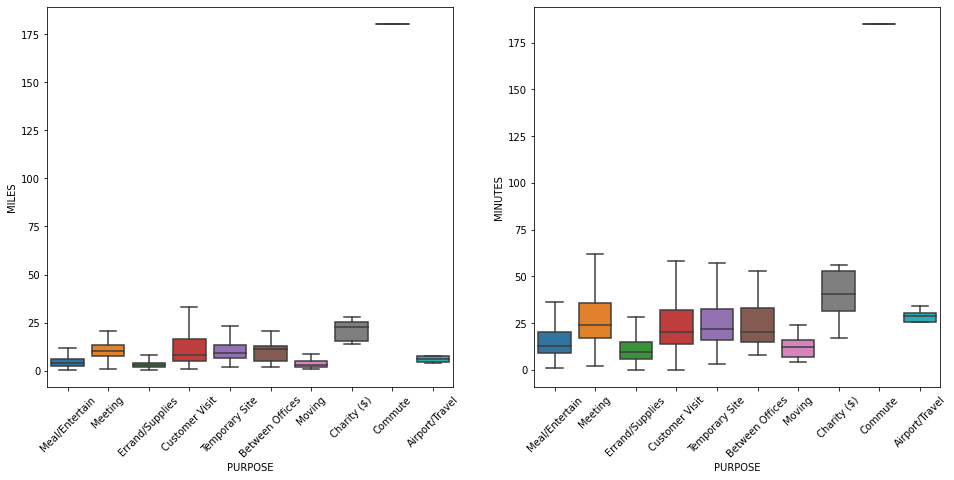

In [27]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES, showfliers = False)
plt.xticks(rotation = 45)
plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MINUTES, showfliers = False)
plt.xticks(rotation = 45);

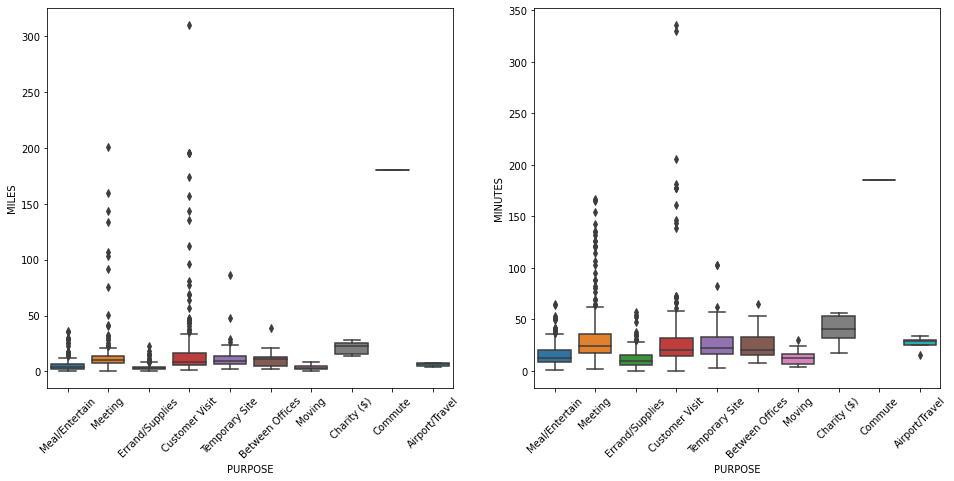

In [28]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES)
plt.xticks(rotation = 45)
plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MINUTES)
plt.xticks(rotation = 45);

We have successfully filled the missing values.  
Now that our dataset is complete, lets proceed to visualizing the data using meaningful plots.

In [29]:
df.nunique()

START_DATE    1154
END_DATE      1154
CATEGORY         2
START          177
STOP           188
MILES          256
PURPOSE         10
DURATION        99
MINUTES         99
dtype: int64

First, we will look at the relationship between the distance (MILES) and time taken (MINUTES).

<AxesSubplot:xlabel='MILES', ylabel='MINUTES'>

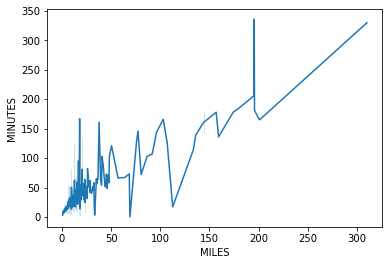

In [30]:
sns.lineplot(data=df, x=df.MILES, y=df.MINUTES)

<AxesSubplot:xlabel='MILES', ylabel='MINUTES'>

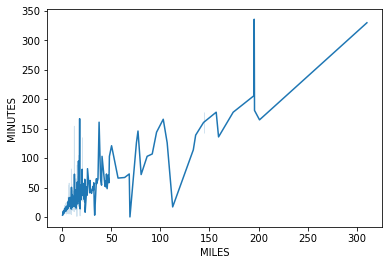

In [36]:
sns.lineplot(data=df[df['CATEGORY'] == 'Business'],x="MILES", y="MINUTES")

<AxesSubplot:xlabel='MILES', ylabel='MINUTES'>

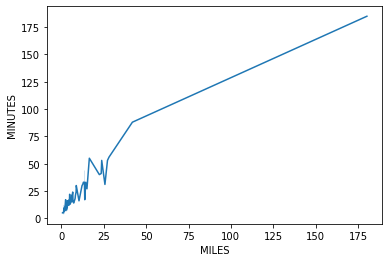

In [35]:
sns.lineplot(data=df[df['CATEGORY'] == 'Personal'],x="MILES", y="MINUTES")